## EPS 109 Midterm Exam Solutions

## 1. PDEs: In words, briefly explain the difference between the Jacobi and Gauss-Seidal methods for iterative solution of partial differential equations

In the Jacobi method, the array keeping track of the temperature distribution (T) is set to equal T_new after all of the points have been updated. In the Gauss-Siedal method, T = T_new is updated everytime a point's new value is calculated. 

## 2. Newton's Method: 
## $ x_{n +1} = x_n - \frac{f(x_n)}{f'(x_n)}$
#### 1. State the purpose of Newton's method in your own words
to find the roots of a function by using the tangent line approximation and seeing where it crosses the x-axis.
#### 2. Give an interpretation of the variables and functions in the formula above. 
$f(x_n)$ is the function we are finding the roots of
<br \>
$f'(x_n)$ is the derivative
<br \>
together they form the tangent
$x_{n+1}$ is the point we are looking at to see if there is a root
$x_n$ is the previous point we are basing the tangent line off of
#### 3. Under what circumstances does Newton's method fail?
When $f'(x) = 0$ , Newton's method fails to converge
#### 4. Use a Taylor series expansion to rederive the formula above
$y = mx + b$
<br \>
let $y_1 = f(x_1), y_0 = 0 $
<br \>
<br \>
$y_1 - y_0 = m(x_1 - x_0) $
<br \>
<br \>
$f(x_1) = -f'(x_1)(x_1 - x_0) $
<br \>
<br \>
$x_1 = x_0 - \frac{f(x_1)}{f'(x_0)}$
<br \>
<br \>
generalized form:
<br \>
$ x_1 = x_0 - \frac{f(x_n)}{f'(x_n)}$

## 3. Random Numbers
#### Write two Python codes that use random numbers and reproduce the images above. In the first case, fill the upper diagonal with exactly 2000 random points. Place 10,000 points to reproduce the second image. In either shape, every point should be selected with the same probability. 

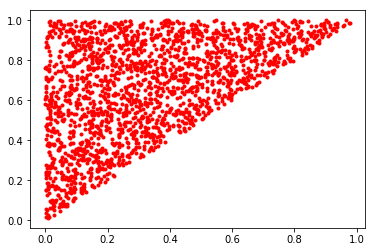

In [9]:
# Figure a:
import numpy as np
import matplotlib.pyplot as plt

num_points = 0
while num_points < 2000:
    x = np.random.random()
    y = np.random.random()
    if y >= x:
        plt.plot(x, y, 'r.')
        num_points += 1
plt.show()

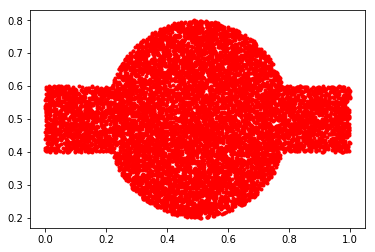

In [8]:
# Figure b: center of circle is 0.5, 0.5. radius is 0.3
def distance(x1, x2, y1, y2):
    return np.sqrt((x1- x2)**2 + (y1 - y2)**2)

num_points = 0
while num_points < 10000:
    x = np.random.random()
    y = np.random.random()
    if y >= 0.4 and y <= 0.6:
        plt.plot(x, y, 'r.')
        num_points += 1
    elif distance(x, 0.5, y, 0.5) <= 0.3:
        plt.plot(x, y, 'r.')
        num_points += 1

plt.show()

## 4. Tides
#### You are given two text files 'tide1.txt' and 'tide2.txt' that contain the water levels from two tides gauges in 30 minutes intervals over the course of a year. The full record is plotted on top and an enlarged section is below:
##### a.)  Considering data in both files, write some Python code that reads both files and determines and prints when highest tide occured, which guage recorded it, and what the water level was

In [ ]:
gauge1 = np.loadtxt('tide1.txt')
gauge2 = np.loadtxt('tide2.txt')

highest_tide_day = 0
gauge_name = ""
water_level = 0

for n in range(len(gauge1)):
    if gauge1[n] > water_level:
        water_level = gauge1[n]
        gauge_name = 'gauge1'
        highest_tide_day = n / 60 / 24
        
    if gauge2[n] > water_level:
        water_level = gauge2[n]
        gauge_name = 'gauge2'
        highest_tide_day = n / 60 / 24

print('Highest tide day: ', highest_tide_day)
print('Gauge recorded: ', gauge_name)
print('Water level (ft): ', water_level)

##### b. A high tide is followed by a low tide approximately 6 hours later. As you can see in the lower graph, there is some noise in the data. This makes it a bit arbitrary when exactly the highest and lowest readings are recorded. Just considering the data file 'tide1.txt', write some python code to determine the magnitude of the largest drop between two consecutive tides. We define the tidal drop as the difference between highest and lowest water level of the two tides.

In [ ]:
tide1 = np.loadtxt('tide1.txt')
largest_drop = 0
for i in range(len(tide1) - 12): #30 min intervals, 6 hours later,= 12 indicies later
    for j in range(12, len(tide1)):
        if tide1[i] - tide[j] > largest_drop:
            largest_drop = tide1[i] - tide1[j]
            
print('Largest drop btwn two consecutive tides: ', largest_drop)

## 5. Escape from California
##### Write some python code that reads the file and determines in which direction Herbert needs to run and what distance he needs to cover before he either reaches California's land boundary or its coast line. 

# $ \theta = tan^{-1}\frac{lon}{lat}$

In [24]:
#location of prison
lat = -119.5604
lon = 36.0980
boundary = np.loadtxt('CA_boundary2.txt')
boundary = np.rot90(boundary)

#temp filler
boundary_lat = -126
boundary_lon = 32

def distance(x1, x2, y1, y2):
    return(np.sqrt((x1-x2)**2 +(y1 - y2)**2))

for i in range(len(boundary)):
    curr_lat = boundary[0][i]
    curr_long = boundary[1][i] 
    
    if distance(lon, curr_long, lat, curr_lat) < distance(lon, boundary_lon, lat, boundary_lat):
        boundary_lon = curr_lon
        boundary_lat = curr_lat
        
print("Distance = ", distance(lon, boundary_lon, lat, boundary_lat))
print("Direction = ", np.arctan(boundary_lon/boundary_lat))

Distance =  7.632958283653853
Direction =  -0.24870998909352285
